<a href="https://colab.research.google.com/github/ssaffiiya/ml-tasks/blob/main/eng_DSMA_Home_Task_3_Sentiment_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home task 3 (Sentiment Analysis)

### Deadline: 20.12 (23:59)

We will be working with the same dataset with comments under Ekaterina Shulman's and Vladimir Putin's New Year's Eve addresses. However, the source of training data is different:

- [RuSentiment: An Enriched Sentiment Analysis Dataset for Social Media in Russian](https://github.com/text-machine-lab/rusentiment) and
- [RuSentiTweet: A Sentiment Analysis Dataset of General Domain Tweets in Russian](https://github.com/sismetanin/rusentitweet)


Your task is:
1. Load the data to train the model and perform exploratory analysis.
2. Pre-process the training data and obtain a set of lemmatised texts.
3. Train a logistic regression based on the vectorised tf-idf dataset as a classifier of positive and negative comments.
4. Compare the quality of the models for the lemmatised texts (1) classifier with random prediction, 2) logistic regression based classifier, 3) logistic regression based classifier with feature engineering (the last one is optional)).
5. Load the data on which we will test the model – Ekaterina Shulman's and Vladimir Putin's New Year's Eve addresses.
6. Evaluate the negative sentiment of the comments under the two videos.
7. (Optional) Give your impressions from the application of logistic regression to the task of sentiment classification to a set of Russian texts.

Explain the choices you make in open-ended questions.


###  Task №0. Data loading

In [ ]:
import pandas as pd

In [ ]:
# Load the files using the correct paths
rusentiment = pd.read_csv('/content/rusentiment_random_posts.csv')
rusentitweet = pd.read_csv('/content/rusentitweet_full.csv')
comments_putin = pd.read_csv('/content/comments_putin.csv')
comments_shulman = pd.read_csv('/content/comments_shulman.csv')

# Verify the data
print(rusentiment.head())
print(rusentitweet.head())


      label                                               text
0  negative  А попа подозревала давно,что ты с кавказа..пер...
1    speech                    З прошедшим Днем Ангела))))))))
2      skip                 Два дня до отлёта с острова!!!!!!!
3  negative   Блин, почему эта жизнь столь не справедлива ((((
4      skip  где еще встречать свой день рождения как не на...
   Unnamed: 0                                               text     label  \
0           0                               @varlamov @McFaul На      skip   
1           1  велл они  всё равно что мусор так что ничего с...  negative   
2           2  "трезвая жизнь какая-то такая стрёмная"\r\n(с)...  negative   
3           3  Ой какие неожиданные результаты 🤭 https://t.co...   neutral   
4           4  @Shvonder_chief @dimsmirnov175 На заборе тоже ...   neutral   

                    id  
0  1327934765807308801  
1  1252943181387350017  
2  1323610669061677056  
3  1336231661160247297  
4  1292421736454127617  


### Task №1 (0.5 points)
Look at the distribution of labels (classes, labels) in both datasets. What can you say about the distribution? How balanced is it? Select only those labels (classes) that correspond to positive and negative comments. Calculate the proportion of these classes in both datasets.

In [ ]:
# Calculate the frequency of occurrence of classes in the rusentiment dataset
rusentiment_label_distribution = rusentiment['label'].value_counts()
rusentiment_label_proportion = rusentiment['label'].value_counts(normalize=True)

print("Frequency of labels in rusentiment dataset:")
print(rusentiment_label_distribution)

print("\nProportion of labels in rusentiment dataset:")
print(rusentiment_label_proportion)

Frequency of labels in rusentiment dataset:
label
neutral     8323
positive    4635
skip        3190
speech      2826
negative    2294
Name: count, dtype: int64

Proportion of labels in rusentiment dataset:
label
neutral     0.391339
positive    0.217933
skip        0.149991
speech      0.132876
negative    0.107862
Name: proportion, dtype: float64


In [ ]:
# Calculate the frequency of occurrence of classes in the rusentitweet dataset
rusentitweet_label_distribution = rusentitweet['label'].value_counts()
rusentitweet_label_proportion = rusentitweet['label'].value_counts(normalize=True)

print("Frequency of labels in rusentitweet dataset:")
print(rusentitweet_label_distribution)

print("\nProportion of labels in rusentitweet dataset:")
print(rusentitweet_label_proportion)

Frequency of labels in rusentitweet dataset:
label
neutral     5341
negative    3298
positive    2414
skip        1843
speech       496
Name: count, dtype: int64

Proportion of labels in rusentitweet dataset:
label
neutral     0.398820
negative    0.246266
positive    0.180257
skip        0.137619
speech      0.037037
Name: proportion, dtype: float64


### Task №2 (0.5 points)

Use the `word_count` function below to count the frequency of tokens in `rusentiment` texts. The `word_count` function should return the number of tokens (list length) after splitting the original text using the `.split()` method


Then use the `matplotlib` library to visualise the number of positive and negative tokens separately.

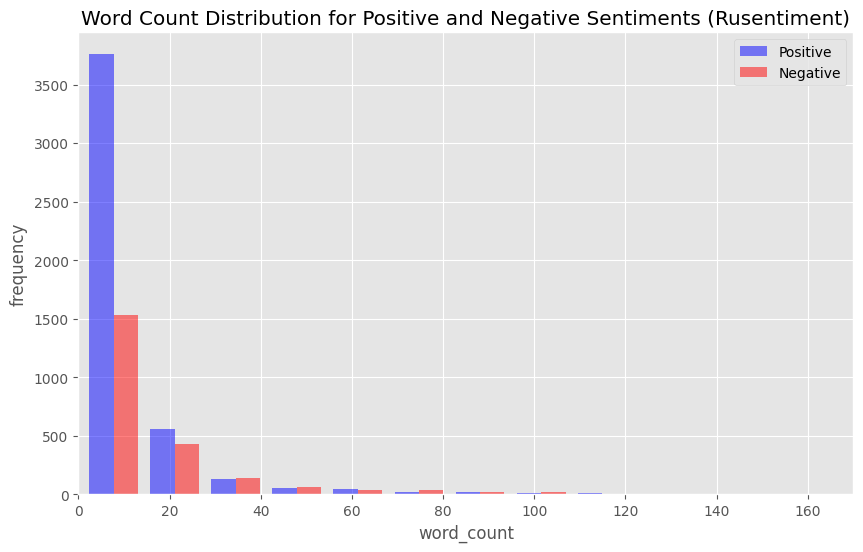

In [ ]:
import matplotlib.pyplot as plt

# Define the word_count function
def word_count(sentence):
    return len(str(sentence).split())

# Apply the word_count function to the text column
rusentiment['word_count'] = rusentiment['text'].apply(word_count)

# Filter word counts for positive and negative sentiments
x = rusentiment[rusentiment['label'] == 'positive']['word_count']
y = rusentiment[rusentiment['label'] == 'negative']['word_count']

# Plot the distributions
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option("display.max_colwidth", 200)

plt.xlim(0, 170)
plt.xlabel('word_count')
plt.ylabel('frequency')
plt.title('Word Count Distribution for Positive and Negative Sentiments (Rusentiment)')
plt.hist([x, y], color=['blue', 'red'], alpha=0.5, label=['Positive', 'Negative'])
plt.legend(loc='upper right')
plt.show()

Repeat the same for the second `rusentitweet` dataset. Compare the results. What problems with the distribution relative to tweet length did you notice?

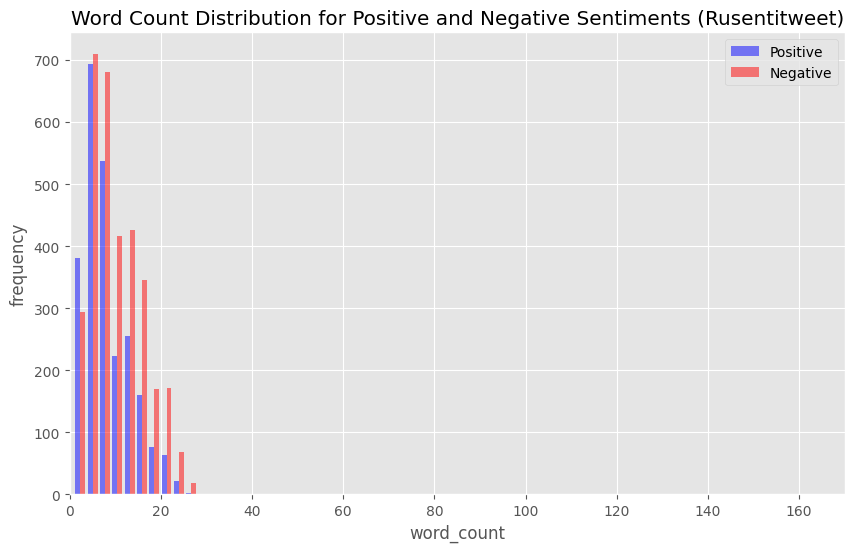

In [ ]:
# Define the word_count function (reuse it from before)
def word_count(sentence):
    return len(str(sentence).split())

# Apply the word_count function to the text column
rusentitweet['word_count'] = rusentitweet['text'].apply(word_count)

# Filter word counts for positive and negative sentiments
x_tweet = rusentitweet[rusentitweet['label'] == 'positive']['word_count']
y_tweet = rusentitweet[rusentitweet['label'] == 'negative']['word_count']

# Plot the distributions
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option("display.max_colwidth", 200)

plt.xlim(0, 170)
plt.xlabel('word_count')
plt.ylabel('frequency')
plt.title('Word Count Distribution for Positive and Negative Sentiments (Rusentitweet)')
plt.hist([x_tweet, y_tweet], color=['blue', 'red'], alpha=0.5, label=['Positive', 'Negative'])
plt.legend(loc='upper right')
plt.show()

For each dataset, count the top 10 words by their occurrence. Use the `Counter` module from the `collections` library, which will sum up all identical items in the list.

In [ ]:
from collections import Counter

# Initialize an empty list to collect all words
all_words1 = []

# Iterate through each line of the 'text' column in rusentiment
for line in list(rusentiment['text']):
    # Split the line into words, convert to lowercase, and extend to the list
    all_words1.extend(str(line).lower().split())

# Get the top 10 most common words
top_10_words_rusentiment = Counter(all_words1).most_common(10)

# Print the result
print("Top 10 words in rusentiment dataset:", top_10_words_rusentiment)

Top 10 words in rusentiment dataset: [('и', 7085), ('в', 5955), ('не', 4672), ('с', 4428), ('на', 3800), ('я', 3592), ('-', 2644), ('что', 2275), ('а', 1963), ('ты', 1808)]


In [ ]:
from collections import Counter

# Initialize an empty list to collect all words
all_words2 = []

# Iterate through each line of the 'text' column in rusentitweet
for line in list(rusentitweet['text']):
    # Split the line into words, convert to lowercase, and extend to the list
    all_words2.extend(str(line).lower().split())

# Get the top 10 most common words
top_10_words_rusentitweet = Counter(all_words2).most_common(10)

# Print the result
print("Top 10 words in rusentitweet dataset:", top_10_words_rusentitweet)

Top 10 words in rusentitweet dataset: [('я', 2642), ('не', 2279), ('в', 2247), ('и', 2117), ('что', 1401), ('на', 1345), ('это', 1053), ('а', 1023), ('с', 953), ('как', 774)]


You can use this code cell here for visualisation:

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

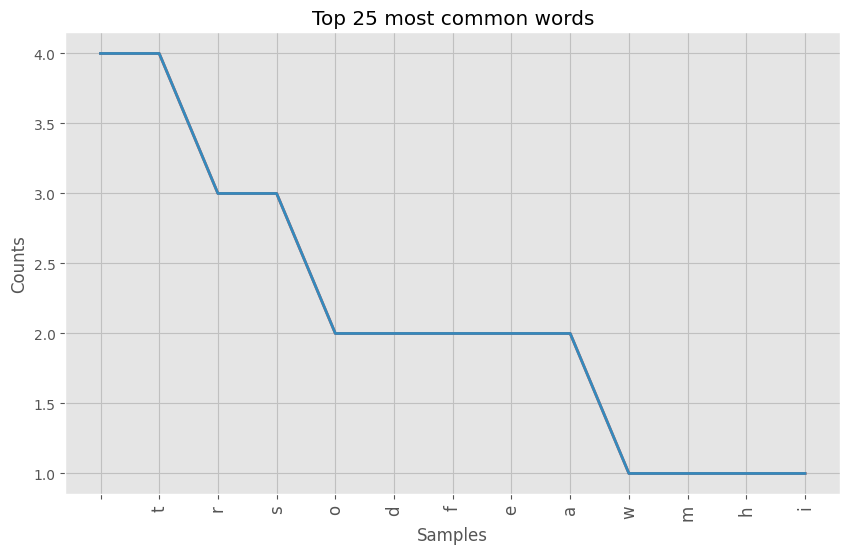

In [ ]:
import nltk

# plot word frequency distribution of first few words
plt.title('Top 25 most common words')
plt.xticks(fontsize=12, rotation=90)
fd1 = nltk.FreqDist("""words from the first dataset""")
fd2 = nltk.FreqDist("""words from the first dataset""")
fd1.plot(25,cumulative=False)
fd2.plot(25,cumulative=False)

### Task №3 (0.5 points)
From the `rusentiment` dataset, pull out the `text` column. Create two new dataframes – one with a `text` column for positive tweets (positive_sentiment), and one with a `text` column for negative tweets (negative_sentiment). You can *check if the label is positive/negative* and pull the column you're looking for using the `.iloc[:, 1]` method.

In [ ]:
# Extract positive sentiments
positive_sentiment = pd.DataFrame(rusentiment[rusentiment['label'] == 'positive']['text'])

# Extract negative sentiments
negative_sentiment = pd.DataFrame(rusentiment[rusentiment['label'] == 'negative']['text'])

# Display the results (optional)
print("Positive Sentiments:\n", positive_sentiment.head())
print("Negative Sentiments:\n", negative_sentiment.head())

Positive Sentiments:
                                                                     text
6                                        патамушта я крутая баба! ееее!!
8                                            урря!я дождался этой овцыы)
11                                                       Наша гордость !
20  ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!
21                               В этом﻿ ролике прекрасно абсолютно всё.
Negative Sentiments:
                                                                                                                               text
0                                                            А попа подозревала давно,что ты с кавказа..перестану общаться с тобой
3                                                                                 Блин, почему эта жизнь столь не справедлива ((((
13                                                   Походу, первым кто поздравил меня с 1 апреля - это РЖД, 40 мин жду элект

Add a column with the classes your classifier will use - 0 for negative tweets and 1 for positive tweets.

In [ ]:
# Add label column
positive_sentiment['label'] = 1
negative_sentiment['label'] = 0

# Display the results (optional)
print("Positive Sentiments with Label:\n", positive_sentiment.head())
print("Negative Sentiments with Label:\n", negative_sentiment.head())

Positive Sentiments with Label:
                                                                     text  \
6                                        патамушта я крутая баба! ееее!!   
8                                            урря!я дождался этой овцыы)   
11                                                       Наша гордость !   
20  ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!   
21                               В этом﻿ ролике прекрасно абсолютно всё.   

    label  
6       1  
8       1  
11      1  
20      1  
21      1  
Negative Sentiments with Label:
                                                                                                                               text  \
0                                                            А попа подозревала давно,что ты с кавказа..перестану общаться с тобой   
3                                                                                 Блин, почему эта жизнь столь не справедлива ((((   
13 

Merge the two dataframes and update the index of the resulting dataframe so that all observations are ranked from 0 to N.

In [ ]:
# Merge the two DataFrames
labeled_sentiments = pd.concat([positive_sentiment, negative_sentiment])

# Reset the index
labeled_sentiments.index = range(len(labeled_sentiments))

# Display the merged DataFrame
print("Merged DataFrame:\n", labeled_sentiments.head())

Merged DataFrame:
                                                                    text  label
0                                       патамушта я крутая баба! ееее!!      1
1                                           урря!я дождался этой овцыы)      1
2                                                       Наша гордость !      1
3  ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!      1
4                               В этом﻿ ролике прекрасно абсолютно всё.      1


### Task №4 (0.5 points)

Do the same steps as in the previous task for `rusentitweet`.

In [ ]:
# Extract positive tweets
positive_tweet = pd.DataFrame(rusentitweet[rusentitweet['label'] == 'positive']['text'])

# Extract negative tweets
negative_tweet = pd.DataFrame(rusentitweet[rusentitweet['label'] == 'negative']['text'])

# Display the DataFrames (optional)
print("Positive Tweets:\n", positive_tweet.head())
print("Negative Tweets:\n", negative_tweet.head())

Positive Tweets:
                                                                       text
8                                         @BTS_twt ты такой красивый 😭😭😭🥺💓
11  @okdaa @wifeyoonminn @Y_Yoon_ Но ты очень красиво и чувственно пишешь(
13                                                 @Susanoo51489064 ВХВХВХ
18                                     @yoursungshine малышка спи сладко ❤
23                          как же я люблю титьки  https://t.co/C2M8rMDFyc
Negative Tweets:
                                                                text
1          велл они  всё равно что мусор так что ничего страшного 🤣
2      "трезвая жизнь какая-то такая стрёмная"\r\n(с) артём azrtusa
9                                     @Ladyzchensk Цыган , хуле ...
15                                     @ZippinkC @lenny_lanzz ПЛАЧУ
20  @bLianaaaa Я також творю хуйню, тому давай творити хуйню разом🤝


In [ ]:
# Add label column
positive_tweet['label'] = 1
negative_tweet['label'] = 0

# Display the DataFrames (optional)
print("Positive Tweets with Label:\n", positive_tweet.head())
print("Negative Tweets with Label:\n", negative_tweet.head())

Positive Tweets with Label:
                                                                       text  \
8                                         @BTS_twt ты такой красивый 😭😭😭🥺💓   
11  @okdaa @wifeyoonminn @Y_Yoon_ Но ты очень красиво и чувственно пишешь(   
13                                                 @Susanoo51489064 ВХВХВХ   
18                                     @yoursungshine малышка спи сладко ❤   
23                          как же я люблю титьки  https://t.co/C2M8rMDFyc   

    label  
8       1  
11      1  
13      1  
18      1  
23      1  
Negative Tweets with Label:
                                                                text  label
1          велл они  всё равно что мусор так что ничего страшного 🤣      0
2      "трезвая жизнь какая-то такая стрёмная"\r\n(с) артём azrtusa      0
9                                     @Ladyzchensk Цыган , хуле ...      0
15                                     @ZippinkC @lenny_lanzz ПЛАЧУ      0
20  @bLianaaaa Я також тво

### Task №5 (rusentiment vs rusentitweet) (0.5 points)
Compare the two dataframes rusentiment and rusentitweet - what are their differences and similarities? Which one might be more useful for the sentiment analysis?

In [ ]:
# Merge the two DataFrames
labeled_tweets = pd.concat([positive_tweet, negative_tweet])

# Reset the index
labeled_tweets.index = range(len(labeled_tweets))

# Display the merged DataFrame
print("Merged DataFrame:\n", labeled_tweets.head())

Merged DataFrame:
                                                                      text  \
0                                        @BTS_twt ты такой красивый 😭😭😭🥺💓   
1  @okdaa @wifeyoonminn @Y_Yoon_ Но ты очень красиво и чувственно пишешь(   
2                                                 @Susanoo51489064 ВХВХВХ   
3                                     @yoursungshine малышка спи сладко ❤   
4                          как же я люблю титьки  https://t.co/C2M8rMDFyc   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  


### Task №6 (0.5 points)
Merge the two dataframes and update the indexing so that observations are indexed from 0 to N.

### Task №7 (1 point)
Create a text cleanup function where non-Cyrillic characters are replaced by an empty space and stopwords are removed. Lemmatise (`lemmatize`) the cleaned text inside the function using `MorphAnalyzer()`. Apply your function to a dataframe column with texts.


In [ ]:
# Merge the two DataFrames
joned_text = pd.concat([labeled_sentiments, labeled_tweets])

# Reset the index
joned_text.index = range(len(joned_text))

# Display the first 10 rows of the merged DataFrame
print(joned_text.head(10))

                                                                   text  label
0                                       патамушта я крутая баба! ееее!!      1
1                                           урря!я дождался этой овцыы)      1
2                                                       Наша гордость !      1
3  ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!      1
4                               В этом﻿ ролике прекрасно абсолютно всё.      1
5              Гопник на деревне. Разбить бутылку монетой. А вам слабо?      1
6                                                        Сказочный мир)      1
7                            Ыыыы)))Мне снова кто-то пополнил счёт)))))      1
8                                               хах,...витаминчики)))**      1
9                                       Финал ББешечки, красиво стильно      1


In [ ]:
# Install pymorphy3
!pip install pymorphy3

# Install NLTK (if not already installed)
!pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 58.4 MB/s eta 0:00:00


In [ ]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords

# Define the pattern for non-Cyrillic characters
patterns = '[^а-яА-ЯёЁ]'  # Matches any non-Cyrillic characters

# Load Russian stopwords
stopwords_ru = set(stopwords.words("russian"))

# Initialize the morphological analyzer
morph = MorphAnalyzer()

# Define the lemmatization function
def lemmatize(doc):
    # Replace non-Cyrillic characters with a space
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        # Remove stopwords and lemmatize
        if token and token not in stopwords_ru:
            token = token.strip()  # Remove any surrounding whitespace
            token = morph.normal_forms(token)[0]  # Lemmatize the word
            tokens.append(token)
    # Return the cleaned and lemmatized text
    if len(tokens) >= 1:
        return " ".join(tokens)
    return None

# Apply the function to the 'text' column
joned_text['text_lemmatized'] = joned_text['text'].apply(lemmatize)

# Display the result
print(joned_text[['text', 'text_lemmatized']].head())

                                                                   text  \
0                                       патамушта я крутая баба! ееее!!   
1                                           урря!я дождался этой овцыы)   
2                                                       Наша гордость !   
3  ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!   
4                               В этом﻿ ролике прекрасно абсолютно всё.   

                                     text_lemmatized  
0                          патамушт крутой баба ееий  
1                              уррить дождаться овцы  
2                                       наш гордость  
3  ты мой маленький счастие я ты любить очень сильно  
4                    в ролик прекрасно абсолютно всё  


### Task №8 (0.5 points)
Check whether missing values have appeared as a result of the lemmatisation. Delete if so.

In [ ]:
# Check for missing values in the DataFrame
missing_values = joned_text.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

# Remove rows with missing values in the 'text_lemmatized' column
joned_text = joned_text.dropna(subset=['text_lemmatized'])

# Reset the index after dropping rows
joned_text = joned_text.reset_index(drop=True)

# Display the cleaned DataFrame and confirm there are no missing values
print("\nUpdated missing values:\n", joned_text.isnull().sum())
print(joned_text.head())


Missing values in the dataset:
 text                0
label               0
text_lemmatized    23
dtype: int64

Updated missing values:
 text               0
label              0
text_lemmatized    0
dtype: int64
                                                                   text  \
0                                       патамушта я крутая баба! ееее!!   
1                                           урря!я дождался этой овцыы)   
2                                                       Наша гордость !   
3  ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!   
4                               В этом﻿ ролике прекрасно абсолютно всё.   

   label                                    text_lemmatized  
0      1                          патамушт крутой баба ееий  
1      1                              уррить дождаться овцы  
2      1                                       наш гордость  
3      1  ты мой маленький счастие я ты любить очень сильно  
4      1                  

In [ ]:
joned_text.label.value_counts()

,count
label,
1,7033
0,5585


To change the content of a cell, double-click on it (or select ‘Enter’)

### Task №9 (0.5 points)
Using the `train_test_split` module (function) of the `sklearn.model_selection` library, split the sample into two parts - in the proportion of 20/80. Set `12348` as the random_state attribute

Compare the distribution of the target attribute in the training and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the sample into training and test sets (80% train, 20% test)
train, test = train_test_split(
    joned_text,
    test_size=0.2,  # 20% of the data goes to the test set
    random_state=12348  # Ensure reproducibility
)

# Print the shape of the training and test datasets
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (10094, 3)
Test dataset shape: (2524, 3)


In [ ]:
# Compare the distribution of the target feature ('label') in the training and test datasets
train_distribution = train['label'].value_counts(normalize=True)
test_distribution = test['label'].value_counts(normalize=True)

print("Distribution of 'label' in the training dataset:\n", train_distribution)
print("\nDistribution of 'label' in the test dataset:\n", test_distribution)

Distribution of 'label' in the training dataset:
 label
1    0.556965
0    0.443035
Name: proportion, dtype: float64

Distribution of 'label' in the test dataset:
 label
1    0.559033
0    0.440967
Name: proportion, dtype: float64


### Task №10 (1 point)
Train tf-idf vectorizer on the training sample separately for positive and negative tweets. Save the training results to the `tf_idf_positive` and `tf_idf_negative` variables

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Initialize TF-IDF vectorizers
count_tfidf_positive = TfidfVectorizer()
count_tfidf_negative = TfidfVectorizer()

# Train TF-IDF vectorizers for positive and negative tweets
tf_idf_positive = count_tfidf_positive.fit_transform(train[train['label'] == 1]['text_lemmatized'])
tf_idf_negative = count_tfidf_negative.fit_transform(train[train['label'] == 0]['text_lemmatized'])

In [ ]:
train[train['label'] == 0].head(5)

,text,label,text_lemmatized
11250,"США перебрасывают войска в Ирак, чтобы атаковать проиранских боевиков https://t.co/B3UZlrQUXJ",0,сша перебрасывать войско ирак атаковать проиранский боевик
5533,"Купила кучу мандаринов,а они все кислючие(((((((Брррррр",0,купить куча мандарин кислючий брррррра
4700,"Никогда не думал, что будет так тяжело расставаться. Впереди ещё 8 месяцев..",0,никогда думать тяжело расставаться впереди ещё месяц
5831,"я тебя сломаю,придуурок!",0,сломать придуурок
6013,"Иногда кажется, что друзей нет.",0,иногда казаться друг


Rank positive and negative words by importance (TF-IDF metric)

In [ ]:
# Save IDF lists for positive and negative classes
positive_importance = pd.DataFrame({
    'word': count_tfidf_positive.get_feature_names_out(),
    'idf': count_tfidf_positive.idf_
}).sort_values(by='idf', ascending=False)

negative_importance = pd.DataFrame({
    'word': count_tfidf_negative.get_feature_names_out(),
    'idf': count_tfidf_negative.idf_
}).sort_values(by='idf', ascending=False)

In [ ]:
count_tfidf_positive.idf_

array([8.53600832, 8.24832625, 7.14971396, ..., 8.24832625, 8.94147343,
       8.94147343])

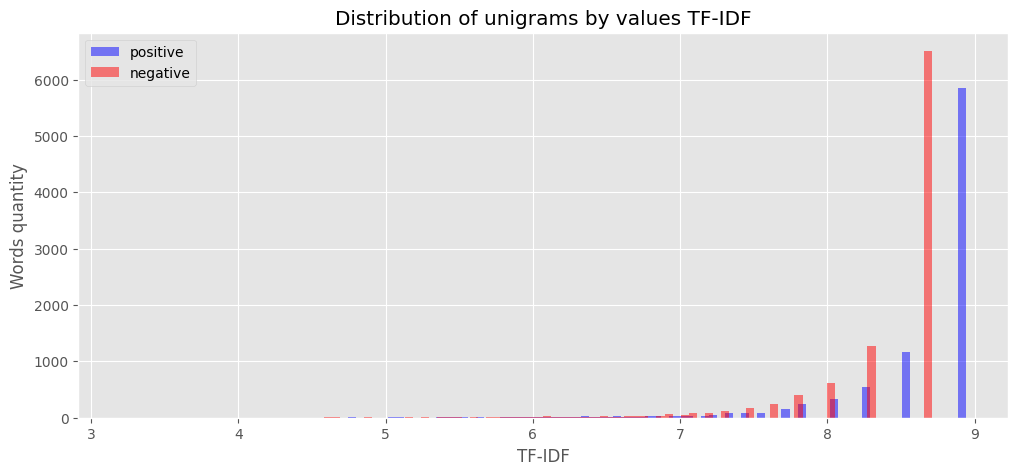

In [ ]:
import matplotlib.pyplot as plt

# Plot the IDF value distribution
fig = plt.figure(figsize=(12, 5))

# Plot positive TF-IDF
plt.hist(count_tfidf_positive.idf_, bins=100, label='positive', alpha=0.5, color='b')

# Plot negative TF-IDF
plt.hist(count_tfidf_negative.idf_, bins=100, label='negative', alpha=0.5, color='r')

# Add labels and legend
plt.title('Distribution of unigrams by values TF-IDF')
plt.xlabel('TF-IDF')
plt.ylabel('Words quantity')
plt.legend()
plt.show()

### Task 11 (0.5 points)

Get vector representations of tweets for the whole sample (tf_idf_base_1), the training part (tf_idf_train_base_1) and the test part (tf_idf_test_base_1).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
count_idf_1 = TfidfVectorizer()

# Obtain vector representation for the whole sample
tf_idf_base_1 = count_idf_1.fit_transform(joned_text['text_lemmatized'])

# Obtain vector representation for the training set
tf_idf_train_base_1 = count_idf_1.transform(train['text_lemmatized'])

# Obtain vector representation for the test set
tf_idf_test_base_1 = count_idf_1.transform(test['text_lemmatized'])

# Display shapes of the vectorized data
print("Whole sample shape:", tf_idf_base_1.shape)
print("Training set shape:", tf_idf_train_base_1.shape)
print("Test set shape:", tf_idf_test_base_1.shape)

Whole sample shape: (12618, 17689)
Training set shape: (10094, 17689)
Test set shape: (2524, 17689)


Train logistic regression on training data using `random_state = 12345`

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_lr_base_1 = LogisticRegression(random_state=12345)

print("Logistic Regression model initialized.")

Logistic Regression model initialized.


In [ ]:
# Train the model on the training dataset
model_lr_base_1.fit(tf_idf_train_base_1, train['label'])

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


Obtain the predicted probabilities of belonging to negative and positive classes (the first column is negative class (0), the second column is positive (1)). Compare the predictions with the actual texts. In your opinion, how well did the classifier perform?

Hint: if Russian is not your native language, translate only examples of sentences. There is no need to translate all the dataset.

In [ ]:
# Predict probabilities for the test dataset
predict_lr_base_proba = model_lr_base_1.predict_proba(tf_idf_test_base_1)

# Display the first 10 predictions
print("Predicted probabilities (first 10):")
print(predict_lr_base_proba[0:10])

Predicted probabilities (first 10):
[[0.2112395  0.7887605 ]
 [0.47121299 0.52878701]
 [0.64948866 0.35051134]
 [0.78030279 0.21969721]
 [0.39094311 0.60905689]
 [0.90356474 0.09643526]
 [0.68271408 0.31728592]
 [0.81463174 0.18536826]
 [0.53152342 0.46847658]
 [0.59682824 0.40317176]]


In [ ]:
# Display the first 10 rows of the test dataset
print("First 10 rows of the test dataset:")
print(test[0:10])

First 10 rows of the test dataset:
                                                                                                                                                                                                          text  \
3369                                                                                                                                       Ты моя подруга, мы с тобой друзья.\nТы такая дура, прямо как и я.xD   
6905                                                                   ммм2011 и ммм2012 обман ни один мой вклад не разу не выплатили что ммм2011 что ммм2012 так что думайте как всем все платится!!!!!!!!!!!   
5181                                                                                                                                                                                     потому что я скучаю:(   
4988                                                                                                                         

### Task 12 (0.5 points)
Compare the resulting classifier with the classifier based on coin flipping (coin_classifier). Use the AUC-ROC graph for interpretation. Interpret the confusion matrix. How well did the model perform on the prediction?

In [ ]:
import numpy as np

# Define the coin classifier
def coin_classifier(test_data):
    # Randomly predict 0 or 1 for the same number of samples as in test_data
    return np.random.randint(0, 2, size=len(test_data))

In [ ]:
# Predict using the coin classifier on the test dataset
coin_predict = coin_classifier(test)
print("Coin classifier predictions (first 10):", coin_predict[:10])

Coin classifier predictions (first 10): [1 0 1 0 0 1 0 0 1 0]


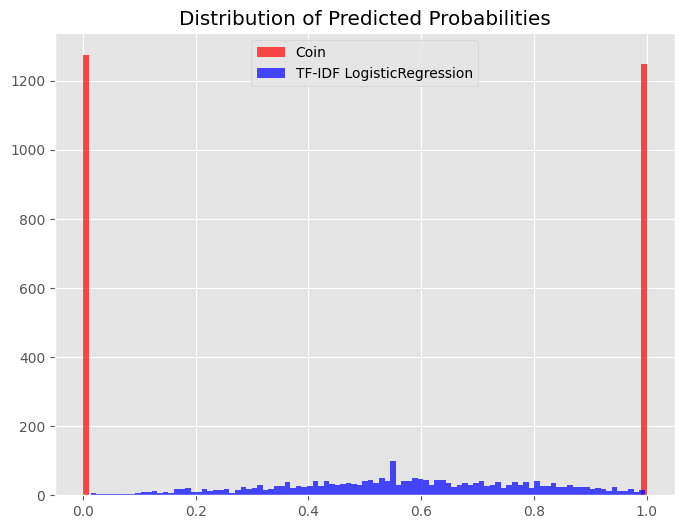

In [ ]:
fif = plt.figure(figsize=(8, 6))

pd.Series(coin_predict)\
    .hist(bins=100, alpha=0.7, color='r', label='Coin')

pd.Series(predict_lr_base_proba[:, 1])\
    .hist(bins=100, alpha=0.7, color='b', label='TF-IDF LogisticRegression')

plt.legend()
plt.title('Distribution of Predicted Probabilities')
plt.show()

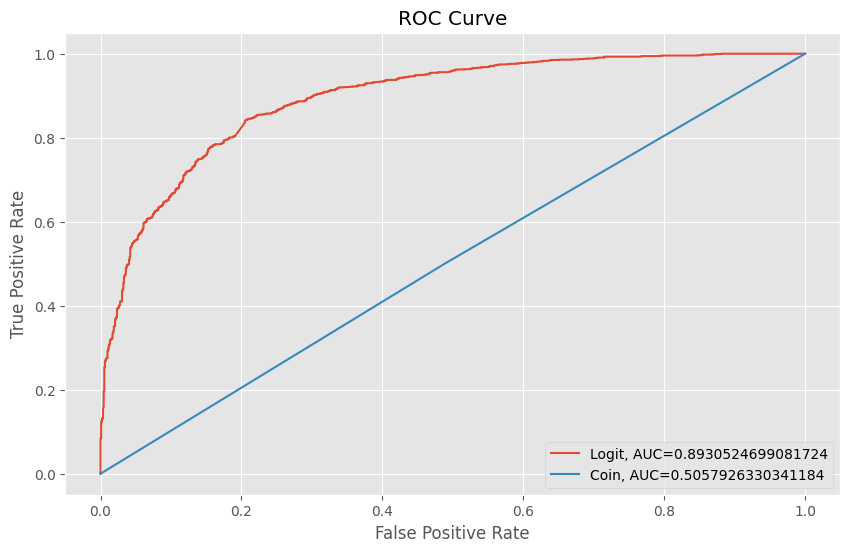

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC and AUC for logistic regression
fpr_base, tpr_base, _ = roc_curve(test['label'], predict_lr_base_proba[:, 1])
roc_auc_base = auc(fpr_base, tpr_base)

# Calculate ROC and AUC for coin classifier
fpr_coin, tpr_coin, _ = roc_curve(test['label'], coin_predict)
roc_auc_coin = auc(fpr_coin, tpr_coin)

# Plot the ROC curves
plt.plot(fpr_base, tpr_base, label="Logit, AUC=" + str(roc_auc_base))
plt.plot(fpr_coin, tpr_coin, label="Coin, AUC=" + str(roc_auc_coin))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(
    test['label'],
    (predict_lr_base_proba[:, 1] > 0.5).astype('float'),
    normalize='true'
)

# Display the confusion matrix
print("Confusion Matrix (normalized):\n", conf_matrix)

Confusion Matrix (normalized):
 [[0.69451932 0.30548068]
 [0.09709426 0.90290574]]


Find the optimal threshold value of the classifier. We find such a value at which both classes are prescaled as correctly as possible. What does it mean that the optimal threshold is below 0.5?

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(test['label'], predict_lr_base_proba[:, 1])

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that gives the maximum F1-score
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.49924729427762443


In [ ]:
import pandas as pd

# Align the lengths by slicing precision, recall, and F1-score
thresholds_adjusted = thresholds  # Use thresholds as is
precision_adjusted = precision[:len(thresholds)]  # Slice to match thresholds
recall_adjusted = recall[:len(thresholds)]  # Slice to match thresholds
f1_scores_adjusted = f1_scores[:len(thresholds)]  # Slice to match thresholds

# Create a DataFrame to display metrics for each threshold
threshold_metrics = pd.DataFrame({
    'Threshold': thresholds_adjusted,
    'Precision': precision_adjusted,
    'Recall': recall_adjusted,
    'F1-Score': f1_scores_adjusted
})

# Sort by F1-score to easily see the best threshold
threshold_metrics = threshold_metrics.sort_values(by='F1-Score', ascending=False)

# Print the top rows of the metrics table
print("Metrics at Different Thresholds:")
print(threshold_metrics.head())

Metrics at Different Thresholds:
     Threshold  Precision    Recall  F1-Score
895   0.499247   0.788628  0.904323  0.842522
904   0.500861   0.790553  0.901488  0.842384
899   0.500011   0.789343  0.902906  0.842314
894   0.499202   0.788141  0.904323  0.842244
896   0.499853   0.788497  0.903614  0.842140


### Task 13 (1 point)
Obtain **feature weights** and sort the features that are most important to assign to both positive and negative classes. How intuitively do these features seem appropriate for assigning a comment to a sentiment class?



In [ ]:
# Extract the feature weights assigned by logistic regression
weights = pd.DataFrame({
    'word': count_idf_1.get_feature_names_out(),
    'weight': model_lr_base_1.coef_.ravel()
})

# Sort weights for negative and positive contributions
weights_min = weights.sort_values(by='weight').head(100)  # Most negative weights
weights_max = weights.sort_values(by='weight', ascending=False).head(100)  # Most positive weights

# Display results
print("Top negative weights:\n", weights_min.head())
print("\nTop positive weights:\n", weights_max.head())

Top negative weights:
           word    weight
1106     блядь -4.378014
8212     нахуй -3.661987
14726     сука -3.459148
10424   пиздец -3.421751
15828  умереть -2.806565

Top positive weights:
            word    weight
6934     любить  4.451376
16624   хороший  4.023605
6931    любимый  3.422521
5794   классный  3.306784
6389     крутой  3.169056


In [ ]:
# Derive the top 100 words contributing to the negative class
top_negative_words = weights.sort_values(by='weight').head(100)
print("Top 100 words for negative class:\n", top_negative_words)

Top 100 words for negative class:
           word    weight
1106     блядь -4.378014
8212     нахуй -3.661987
14726     сука -3.459148
10424   пиздец -3.421751
15828  умереть -2.806565
...        ...       ...
1203   больной -1.219269
3842      дура -1.216348
15663  удалить -1.202069
13881  слишком -1.199765
6795      лишь -1.196374

[100 rows x 2 columns]


In [ ]:
# Derive the top 100 words contributing to the positive class
top_positive_words = weights.sort_values(by='weight', ascending=False).head(100)
print("Top 100 words for positive class:\n", top_positive_words)

Top 100 words for positive class:
            word    weight
6934     любить  4.451376
16624   хороший  4.023605
6931    любимый  3.422521
5794   классный  3.306784
6389     крутой  3.169056
...         ...       ...
16321     фотка  1.258875
10739  подарить  1.258195
4741       зато  1.254901
4801        зая  1.253746
16404        ха  1.248644

[100 rows x 2 columns]


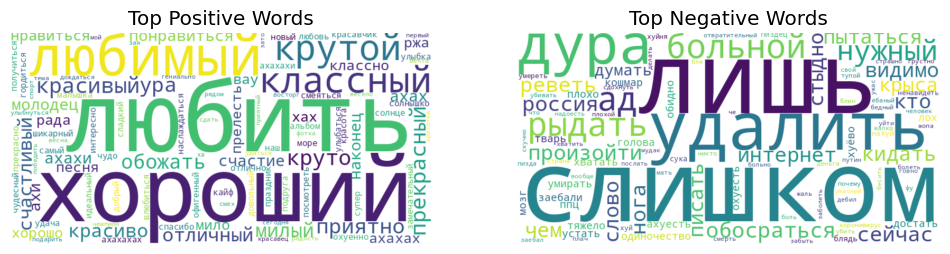

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for positive words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(weights_max['word'], weights_max['weight']))
)

# Generate word cloud for negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(weights_min['word'], weights_min['weight']))
)

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Positive Words")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Negative Words")

plt.show()

While it is convenient to use a word cloud in the presentation, it is better to use graphs in the text. For rxample:

In [ ]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

In [ ]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # Get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])

    # Plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    )
    plt.title("Top Coefficients")
    plt.show()

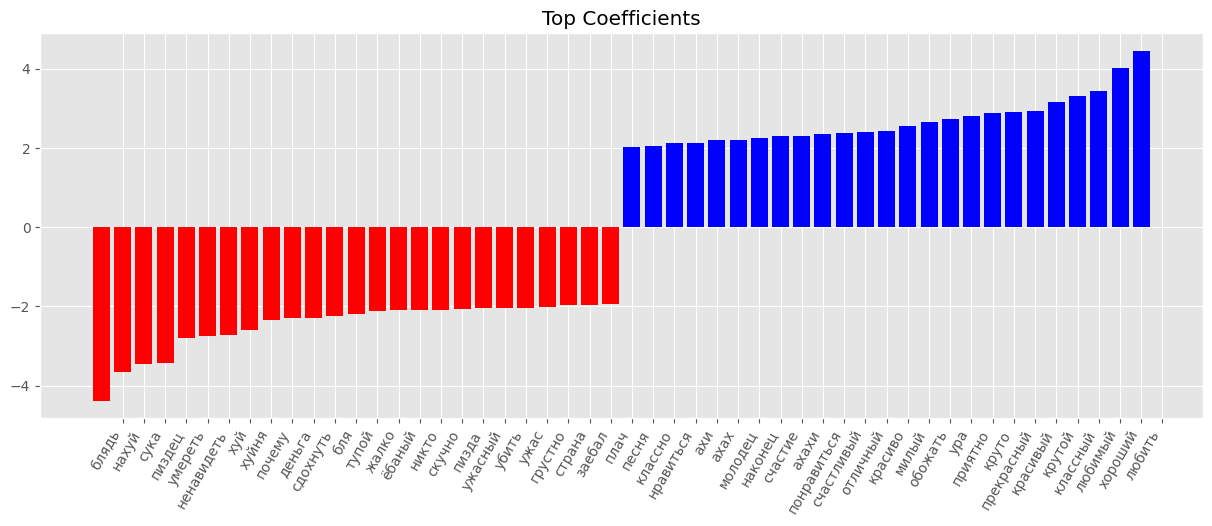

In [ ]:
visualize_coefficients(model_lr_base_1, count_idf_1.get_feature_names_out())


### Task 14 (optional)
Plot a histogram of the significance of the words. Using this histogram, determine the lower and upper threshold for the informativeness of the features. Reduce the dimensionality of the feature space by using uninformative words.


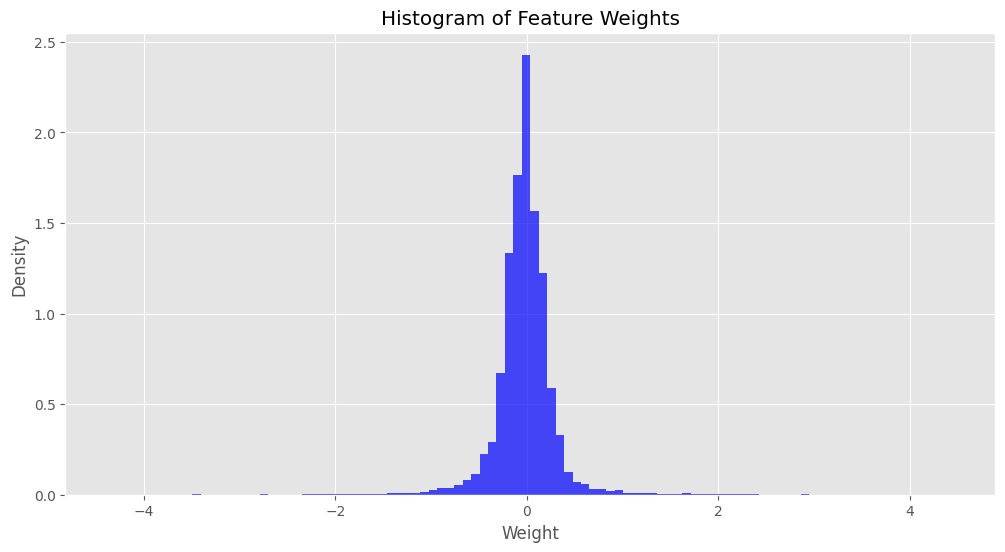

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of feature weights
plt.figure(figsize=(12, 6))
plt.hist(weights['weight'], bins=100, density=True, alpha=0.7, color='blue')
plt.title('Histogram of Feature Weights')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

In [ ]:
# Define thresholds for informativeness
n_positive = 0.5  # Positive threshold for informative features
n_negative = -0.5  # Negative threshold for informative features

# Filter out uninformative features (weights close to 0)
weights_filtered = weights[weights['weight'] != 0]
print("Filtered weights (non-zero):\n", weights_filtered)

weights_uninformative = weights_filtered[
    (weights_filtered['weight'] < n_positive) &
    (weights_filtered['weight'] > n_negative)
]
print("Uninformative weights:\n", weights_uninformative)

Filtered weights (non-zero):
               word    weight
0               аа  0.000842
1              ааа  0.316218
2             аааа  0.582275
3            ааааа -0.104433
4           аааааа  0.660783
...            ...       ...
17684  ёпттвоюмать -0.252203
17685         ёпть  0.077091
17686     ёрничать -0.336789
17687          ёта -0.232318
17688  ёхххоооуууа  0.257737

[15385 rows x 2 columns]
Uninformative weights:
               word    weight
0               аа  0.000842
1              ааа  0.316218
3            ааааа -0.104433
5          ааааааа  0.422343
6         аааааааа  0.347392
...            ...       ...
17684  ёпттвоюмать -0.252203
17685         ёпть  0.077091
17686     ёрничать -0.336789
17687          ёта -0.232318
17688  ёхххоооуууа  0.257737

[14237 rows x 2 columns]


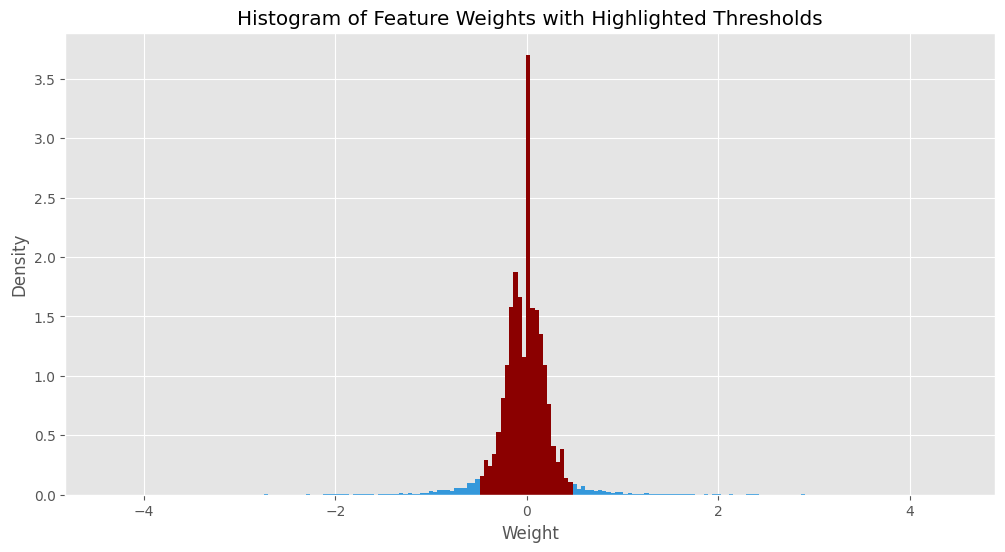

In [ ]:
from matplotlib import colors

# Define the number of bins for the histogram
n_bins = 200

# Plot the histogram
ax = weights['weight'].plot.hist(bins=n_bins, density=True, figsize=(12, 6))

# Highlight bars based on the thresholds
for bar in ax.patches:
    # Get x midpoint of the bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # Change bar color based on the thresholds
    if x > n_positive or x < n_negative:
        bar.set_facecolor('#3498db')  # Informative
    else:
        bar.set_facecolor('darkred')  # Uninformative

# Add titles and labels
plt.title('Histogram of Feature Weights with Highlighted Thresholds')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

### Task 15 (optional)
Do the same analysis with the reduced feature space. How much did the reduced feature space affect the quality of the model? Confirm what you say with the AUC-ROC plot and the new error matrix.

random_state = 12345 for logit regression

In [ ]:
# Filter the most informative words based on thresholds
vocab_005 = weights[(weights['weight'] > 0.5) | (weights['weight'] < -0.5)]['word'].tolist()

# Initialize TF-IDF vectorizer with reduced vocabulary
from sklearn.feature_extraction.text import TfidfVectorizer
count_idf = TfidfVectorizer(vocabulary=vocab_005)

# Transform data using reduced feature space
tf_idf_train = count_idf.fit_transform(train['text_lemmatized'])
tf_idf_test = count_idf.transform(test['text_lemmatized'])

# Train logistic regression
from sklearn.linear_model import LogisticRegression
model_lr_base = LogisticRegression(random_state=12345)
model_lr_base.fit(tf_idf_train, train['label'])

print("Model trained on reduced feature space!")

Model trained on reduced feature space!


In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
predict_lr_base_proba_1 = model_lr_base.predict_proba(tf_idf_test)

# Compute FPR, TPR, and AUC for the reduced feature space
fpr_base_1, tpr_base_1, _ = roc_curve(test['label'], predict_lr_base_proba_1[:, 1])
roc_auc_base_1 = auc(fpr_base_1, tpr_base_1)

print("AUC on reduced feature space:", roc_auc_base_1)

AUC on reduced feature space: 0.8821918401368276


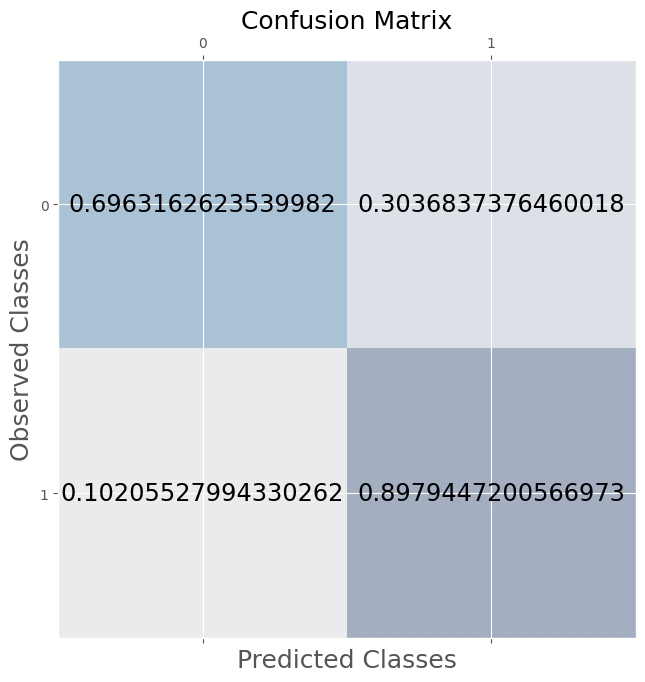

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(
    y_true=test['label'],
    y_pred=(predict_lr_base_proba_1[:, 1] > 0.5).astype('int'),
    normalize='true'
)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel("Predicted Classes", fontsize=18)
plt.ylabel("Observed Classes", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

### Task 16 (2 points)

Use the trained model to predict the sentiment of comments on the comments under Putin's and Shulman's addresses.

* Download data for analysis.
* Perform necessary data preparation – clean missing values.
* Pre-process the texts.
* Lemmatise the texts with the same `lemmatize' function that was applied to the corpus on which we trained the model.
* Vectorise the resulting comments.
* Create a list with the most important words for the two figures, visualise with a word cloud.
* Draw a distribution graph of the negative class membership of the comments. Add the mean and median.
* Draw meaningful conclusions, evaluate how well the classifier performed. Compare with the results we got in the workshop.

In [ ]:
# Load the data for Putin's and Shulman's comments
comments_putin_df = pd.read_csv('comments_putin.csv')  # Adjust the path as needed
comments_shulman_df = pd.read_csv('comments_shulman.csv')  # Adjust the path as needed

print("Data for Putin's comments loaded:\n", comments_putin_df.head())
print("Data for Shulman's comments loaded:\n", comments_shulman_df.head())

Data for Putin's comments loaded:
    Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                                                               comment  
0                                                                                                                                                        Народ тебя никогда не забудет  
1                                                                                                                Желаю путину всего того , что он сделал для народа !!! Очень искренне  
2                                                                                                                             Зашёл сюда не послушать,  а почитать! Сильно улыбнуло)))  
3  2046 год. Путин: "Год был непростым, прошу отнестись с пониманием. Я очень устал, но я остаюсь с вами. Над страной нави

In [ ]:
# Convert all entries in the 'comment' column to strings
comments_putin_df['comment'] = comments_putin_df['comment'].astype(str)
comments_shulman_df['comment'] = comments_shulman_df['comment'].astype(str)

In [ ]:
# Apply the lemmatize function
comments_putin_df['text_lemmatized'] = comments_putin_df['comment'].apply(lemmatize)
comments_shulman_df['text_lemmatized'] = comments_shulman_df['comment'].apply(lemmatize)

# Drop rows with missing lemmatized text
comments_putin_df = comments_putin_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)
comments_shulman_df = comments_shulman_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)

print("Lemmatized text added to DataFrames.")

Lemmatized text added to DataFrames.


In [ ]:
# Ensure all entries in 'comment' are strings
comments_putin_df['comment'] = comments_putin_df['comment'].astype(str)
comments_shulman_df['comment'] = comments_shulman_df['comment'].astype(str)

# Apply the lemmatize function
comments_putin_df['text_lemmatized'] = comments_putin_df['comment'].apply(lemmatize)
comments_shulman_df['text_lemmatized'] = comments_shulman_df['comment'].apply(lemmatize)

# Drop rows with missing lemmatized text
comments_putin_df = comments_putin_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)
comments_shulman_df = comments_shulman_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)

print("Lemmatized text added to DataFrames.")

Lemmatized text added to DataFrames.


In [ ]:
# Define a safe lemmatize function to handle non-string inputs
def safe_lemmatize(doc):
    if isinstance(doc, str):  # Process only if the input is a string
        return lemmatize(doc)
    return None  # Return None for non-string inputs

# Ensure all entries in the 'comment' column are strings or handle NaNs
comments_putin_df['text_lemmatized'] = comments_putin_df['comment'].apply(safe_lemmatize)
comments_shulman_df['text_lemmatized'] = comments_shulman_df['comment'].apply(safe_lemmatize)

# Drop rows with missing lemmatized text
comments_putin_df = comments_putin_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)
comments_shulman_df = comments_shulman_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)

print("Lemmatized text added to DataFrames.")

Lemmatized text added to DataFrames.


KeyError: 'negative_proba'

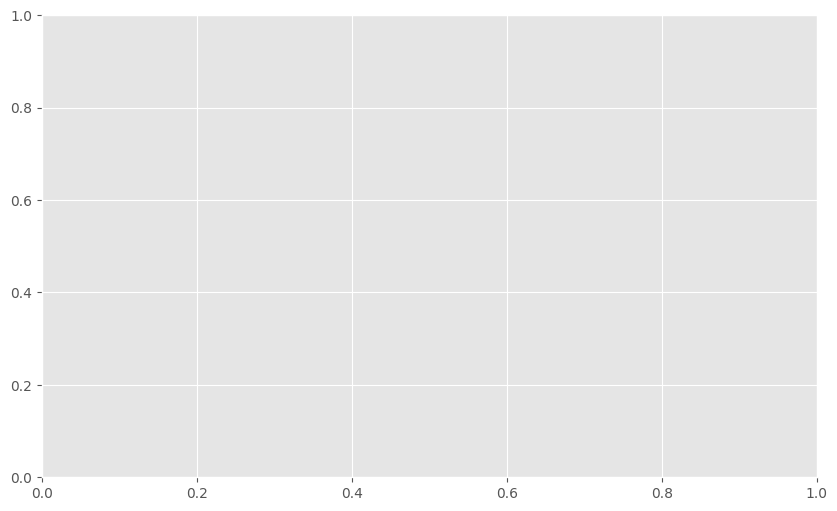

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot density of the negative probabilities
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

comments_shulman_df['negative_proba'].plot(kind='density', label="Shulman's Comments", ax=ax)
comments_putin_df['negative_proba'].plot(kind='density', label="Putin's Comments", ax=ax)

# Add mean and median lines
plt.axvline(np.median(comments_shulman_df['negative_proba']), color="darkred", linestyle='--', label="Shulman Median")
plt.axvline(np.median(comments_putin_df['negative_proba']), color="#3498db", linestyle='--', label="Putin Median")
plt.axvline(np.mean(comments_shulman_df['negative_proba']), color="red", linestyle='--', label="Shulman Mean")
plt.axvline(np.mean(comments_putin_df['negative_proba']), color="darkblue", linestyle='--', label="Putin Mean")

# Configure the plot
plt.title("Negative Class Probability Distribution")
plt.xlabel("Negative Probability")
plt.ylabel("Density")
plt.legend(loc=1)
plt.xlim(0, 1)
plt.show()

KeyError: 'negative_proba'

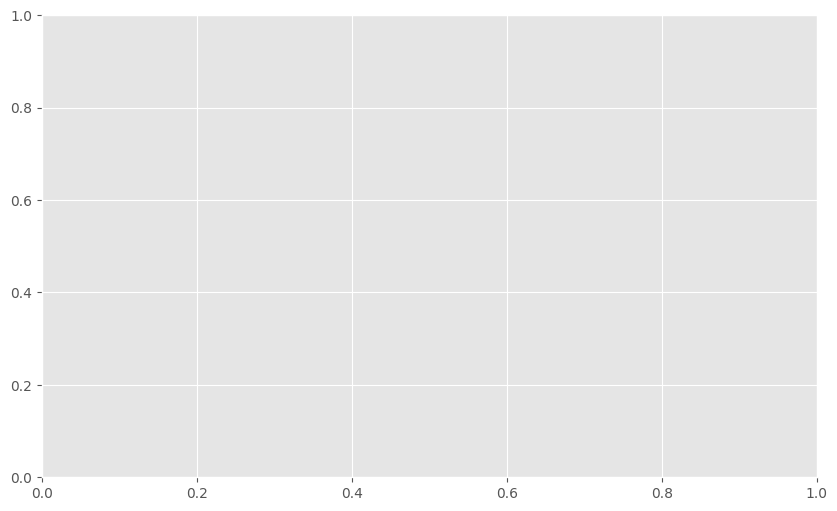

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot density of the negative probabilities
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

comments_shulman_df['negative_proba'].plot(kind='density', label="Shulman's Comments", ax=ax)
comments_putin_df['negative_proba'].plot(kind='density', label="Putin's Comments", ax=ax)

# Add mean and median lines
plt.axvline(np.median(comments_shulman_df['negative_proba']), color="darkred", linestyle='--', label="Shulman Median")
plt.axvline(np.median(comments_putin_df['negative_proba']), color="#3498db", linestyle='--', label="Putin Median")
plt.axvline(np.mean(comments_shulman_df['negative_proba']), color="red", linestyle='--', label="Shulman Mean")
plt.axvline(np.mean(comments_putin_df['negative_proba']), color="darkblue", linestyle='--', label="Putin Mean")

# Configure the plot
plt.title("Negative Class Probability Distribution")
plt.xlabel("Negative Probability")
plt.ylabel("Density")
plt.legend(loc=1)
plt.xlim(0, 1)
plt.show()

In [ ]:
# Clean and lemmatize the comments
comments_putin_df['text_lemmatized'] = comments_putin_df['text'].apply(lemmatize)
comments_shulman_df['text_lemmatized'] = comments_shulman_df['text'].apply(lemmatize)

# Remove rows with missing values
comments_putin_df = comments_putin_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)
comments_shulman_df = comments_shulman_df.dropna(subset=['text_lemmatized']).reset_index(drop=True)

# Vectorize the lemmatized texts
comments_putin_vectorized = count_idf.transform(comments_putin_df['text_lemmatized'])
comments_shulman_vectorized = count_idf.transform(comments_shulman_df['text_lemmatized'])

# Predict probabilities of the negative class
comments_putin_df['negative_proba'] = model_lr_base.predict_proba(comments_putin_vectorized)[:, 0]
comments_shulman_df['negative_proba'] = model_lr_base.predict_proba(comments_shulman_vectorized)[:, 0]

print("Predicted sentiment probabilities for Putin's comments:\n", comments_putin_df.head())
print("Predicted sentiment probabilities for Shulman's comments:\n", comments_shulman_df.head())

### Task 17 (optional).
Based on the lecture/seminar material and your own ideas, how could the training data and the classifier itself be processed to improve the quality of the model?